In [1]:
import re
import pandas as pd

C:\Users\91955\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\91955\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
f = open('WhatsApp Chat with BizMind Hub.txt', 'r', encoding= 'utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

16/03/2023, 14:53 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
06/06/2022, 18:36 - Priyanshu Ece created group "BizMind Hub"
16/03/2023, 14:53 - You joined using this group's invite link
16/03/2023, 14:53 - +91 95061 28080 joined using this group's invite link
16/03/2023, 14:59 - Indrajeet Raj joined using this group's invite link
16/03/2023, 17:03 - +91 70689 40924 joined using this group's invite link
16/03/2023, 17:59 - +91 63936 73742 joined using this group's invite link
16/03/2023, 18:51 - +91 63867 45752 joined using this group's invite link
16/03/2023, 19:17 - Shekhar Bhaiya Mca joined using this group's invite link
16/03/2023, 20:39 - +91 63984 80854 joined using this group's invite link
16/03/2023, 21:45 - +91 88820 21731 joined using this group's invite link
17/03/2023, 00:29 - +91 90971 13301 joined using this group's invite link
17/03/2023, 00:29 - +91 85419 67651 joined using 

In [5]:
print(type(data))

<class 'str'>


In [6]:
pattern = '\d{2}/\d{2}/\d{4}, \d{2}:\d{2}\s-\s'

In [7]:
msg = re.split(pattern, data)[1:]
msg

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Priyanshu Ece created group "BizMind Hub"\n',
 "You joined using this group's invite link\n",
 "+91 95061 28080 joined using this group's invite link\n",
 "Indrajeet Raj joined using this group's invite link\n",
 "+91 70689 40924 joined using this group's invite link\n",
 "+91 63936 73742 joined using this group's invite link\n",
 "+91 63867 45752 joined using this group's invite link\n",
 "Shekhar Bhaiya Mca joined using this group's invite link\n",
 "+91 63984 80854 joined using this group's invite link\n",
 "+91 88820 21731 joined using this group's invite link\n",
 "+91 90971 13301 joined using this group's invite link\n",
 "+91 85419 67651 joined using this group's invite link\n",
 "+91 63922 26531 joined using this group's invite link\n",
 "Raj Vardhan joined using this group's invite link\n",
 "+91 85868 57784 joined using this group

In [8]:
dates = re.findall(pattern, data)
dates

['16/03/2023, 14:53 - ',
 '06/06/2022, 18:36 - ',
 '16/03/2023, 14:53 - ',
 '16/03/2023, 14:53 - ',
 '16/03/2023, 14:59 - ',
 '16/03/2023, 17:03 - ',
 '16/03/2023, 17:59 - ',
 '16/03/2023, 18:51 - ',
 '16/03/2023, 19:17 - ',
 '16/03/2023, 20:39 - ',
 '16/03/2023, 21:45 - ',
 '17/03/2023, 00:29 - ',
 '17/03/2023, 00:29 - ',
 '17/03/2023, 08:26 - ',
 '17/03/2023, 11:23 - ',
 '18/03/2023, 07:02 - ',
 '18/03/2023, 22:22 - ',
 '20/03/2023, 13:11 - ',
 '20/03/2023, 19:44 - ',
 '20/03/2023, 20:48 - ',
 '21/03/2023, 22:23 - ',
 '22/03/2023, 10:09 - ',
 '22/03/2023, 15:11 - ',
 '23/03/2023, 15:07 - ',
 '24/03/2023, 10:11 - ',
 '24/03/2023, 10:11 - ',
 '24/03/2023, 12:10 - ',
 '24/03/2023, 13:28 - ',
 '24/03/2023, 15:45 - ',
 '25/03/2023, 10:29 - ',
 '25/03/2023, 10:29 - ',
 '25/03/2023, 10:30 - ',
 '25/03/2023, 19:13 - ',
 '25/03/2023, 21:32 - ',
 '28/03/2023, 10:28 - ',
 '28/03/2023, 11:59 - ',
 '28/03/2023, 21:06 - ',
 '29/03/2023, 08:11 - ',
 '29/03/2023, 13:22 - ',
 '30/03/2023, 09:00 - ',


In [9]:
df = pd.DataFrame({'user_msg':msg, 'msg_date': dates})
#convert msg_date type  
df['msg_date'] = pd.to_datetime(df['msg_date'], format='%d/%m/%Y, %H:%M - ')

df.rename(columns={'msg_date': 'date'}, inplace=True)

df.head()  

,user_msg,date
0,Messages and calls are end-to-end encrypted. N...,2023-03-16 14:53:00
1,"Priyanshu Ece created group ""BizMind Hub""\n",2022-06-06 18:36:00
2,You joined using this group's invite link\n,2023-03-16 14:53:00
3,+91 95061 28080 joined using this group's invi...,2023-03-16 14:53:00
4,Indrajeet Raj joined using this group's invite...,2023-03-16 14:59:00


In [10]:
df.shape

(140, 2)

In [11]:
#separate user and msg  
users = []
msgs = []
for msg in df['user_msg']:
    entry = re.split('([\w\W]+?):\s', msg)
    if entry[1:]: #user name
        users.append(entry[1])
        msgs.append(entry[2])
    else:
        users.append('group_notification')
        msgs.append(entry[0])
        
df['user'] = users
df['msg'] = msgs
df.drop(columns=['user_msg'], inplace=True)

df.head() 

,date,user,msg
0,2023-03-16 14:53:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-06-06 18:36:00,group_notification,"Priyanshu Ece created group ""BizMind Hub""\n"
2,2023-03-16 14:53:00,group_notification,You joined using this group's invite link\n
3,2023-03-16 14:53:00,group_notification,+91 95061 28080 joined using this group's invi...
4,2023-03-16 14:59:00,group_notification,Indrajeet Raj joined using this group's invite...


In [12]:
df['date'].dt.year

0      2023
1      2022
2      2023
3      2023
4      2023
       ... 
135    2024
136    2024
137    2025
138    2025
139    2025
Name: date, Length: 140, dtype: int32

In [13]:
df['year'] = df['date'].dt.year
df.head()

,date,user,msg,year
0,2023-03-16 14:53:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023
1,2022-06-06 18:36:00,group_notification,"Priyanshu Ece created group ""BizMind Hub""\n",2022
2,2023-03-16 14:53:00,group_notification,You joined using this group's invite link\n,2023
3,2023-03-16 14:53:00,group_notification,+91 95061 28080 joined using this group's invi...,2023
4,2023-03-16 14:59:00,group_notification,Indrajeet Raj joined using this group's invite...,2023


In [14]:
df['month_name'] = df['date'].dt.month_name()
df.head()

,date,user,msg,year,month_name
0,2023-03-16 14:53:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,March
1,2022-06-06 18:36:00,group_notification,"Priyanshu Ece created group ""BizMind Hub""\n",2022,June
2,2023-03-16 14:53:00,group_notification,You joined using this group's invite link\n,2023,March
3,2023-03-16 14:53:00,group_notification,+91 95061 28080 joined using this group's invi...,2023,March
4,2023-03-16 14:59:00,group_notification,Indrajeet Raj joined using this group's invite...,2023,March


In [15]:
df['month'] = df['date'].dt.month  
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()  
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute 

df.head()

,date,user,msg,year,month_name,month,day,day_name,hour,minute
0,2023-03-16 14:53:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,March,3,16,Thursday,14,53
1,2022-06-06 18:36:00,group_notification,"Priyanshu Ece created group ""BizMind Hub""\n",2022,June,6,6,Monday,18,36
2,2023-03-16 14:53:00,group_notification,You joined using this group's invite link\n,2023,March,3,16,Thursday,14,53
3,2023-03-16 14:53:00,group_notification,+91 95061 28080 joined using this group's invi...,2023,March,3,16,Thursday,14,53
4,2023-03-16 14:59:00,group_notification,Indrajeet Raj joined using this group's invite...,2023,March,3,16,Thursday,14,59


In [16]:
# to check by particular user
df[df['user'] == '+91 85419 67651']

,date,user,msg,year,month_name,month,day,day_name,hour,minute
29,2023-03-25 10:29:00,+91 85419 67651,,2023,March,3,25,Saturday,10,29
30,2023-03-25 10:29:00,+91 85419 67651,This message was deleted\n,2023,March,3,25,Saturday,10,29
31,2023-03-25 10:30:00,+91 85419 67651,,2023,March,3,25,Saturday,10,30
50,2023-04-14 08:32:00,+91 85419 67651,<Media omitted>\n,2023,April,4,14,Friday,8,32
51,2023-04-14 08:32:00,+91 85419 67651,<Media omitted>\n,2023,April,4,14,Friday,8,32
52,2023-04-14 08:32:00,+91 85419 67651,<Media omitted>\n,2023,April,4,14,Friday,8,32
139,2025-02-23 20:39:00,+91 85419 67651,https://t.me/cryptowithkiran\n,2025,February,2,23,Sunday,20,39


In [17]:
df['msg']

0      Messages and calls are end-to-end encrypted. N...
1            Priyanshu Ece created group "BizMind Hub"\n
2            You joined using this group's invite link\n
3      +91 95061 28080 joined using this group's invi...
4      Indrajeet Raj joined using this group's invite...
                             ...                        
135    https://youtu.be/IxzesJJ77aE?feature=shared ho...
136                                    <Media omitted>\n
137                                    <Media omitted>\n
138    https://chat.whatsapp.com/FuKipkhTDwy93pa0ERxX...
139                       https://t.me/cryptowithkiran\n
Name: msg, Length: 140, dtype: object

In [18]:
for msg in df['msg']:
    print(msg.split())

['Messages', 'and', 'calls', 'are', 'end-to-end', 'encrypted.', 'No', 'one', 'outside', 'of', 'this', 'chat,', 'not', 'even', 'WhatsApp,', 'can', 'read', 'or', 'listen', 'to', 'them.', 'Tap', 'to', 'learn', 'more.']
['Priyanshu', 'Ece', 'created', 'group', '"BizMind', 'Hub"']
['You', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '95061', '28080', 'joined', 'using', 'this', "group's", 'invite', 'link']
['Indrajeet', 'Raj', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '70689', '40924', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '63936', '73742', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '63867', '45752', 'joined', 'using', 'this', "group's", 'invite', 'link']
['Shekhar', 'Bhaiya', 'Mca', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '63984', '80854', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '88820', '21731', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91

In [19]:
words = []
for msg in df['msg']:
    words.extend(msg.split())

In [20]:
len(words)

1668

In [21]:
!pip install urlextract

Defaulting to user installation because normal site-packages is not writeable


In [22]:
from urlextract import URLExtract

In [23]:
extractor = URLExtract()
urls = extractor.find_urls("let's www.gmail.com URL stackoverflow.com as an example google.com, http://facebook.com, ftp://url.in")
urls  

['www.gmail.com',
 'stackoverflow.com',
 'google.com',
 'http://facebook.com',
 'ftp://url.in']

In [24]:
links = []

for msg in df['msg']:
    print(extractor.find_urls(msg))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://jigyasa.iirs.gov.in/yuvika']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://youtu.be/jR2ho31tor4']
[]
[]
[]
[]
[]
[]
['https://youtu.be/8ClN8X3YQAo']
[]
[]
[]
[]
[]
['https://www.sibyl.digital/']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://youtu.be/DzugfL_HEMw']
[]
['https://m.economictimes.com/markets/stocks/earnings/flipkart-losses-widened-to-over-rs-7800-crore-in-fy22/articleshow/95361053.cms']
[]
[]
[]
['https://youtu.be/t1mLUJl3ZZk']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://docs.google.com/forms/d/e/1FAIpQLSeRJT5vP6ePQZHTkVw0Ltl3v91uRDKSO8KIKwd_dNHYjuqILA/viewform?usp=sf_link']
[]
['https://www.investopedia.com/terms/i/ipo.asp']
[]
[]
[]
[]
[]
[]
[]
[]
['https://docs.google.com/forms/d/e/1FAIpQLSfcOl3UTxcVvhno2Uqe-vfRTAsSir48JskV73OrIaXDmxoz4Q/viewform?fbzx=-1994799594503595132']
[]
['https://youtu.be/6gC5Bwht9yY']
[]
[]
[]
['https://www.business-standard.com/companies/news/bank-of-baroda-launches

In [25]:
links = []

for msg in df['msg']:
    links.extend(extractor.find_urls(msg))

In [26]:
len(links)
#links

28

In [27]:
x = df['user'].value_counts().head()

In [28]:
import matplotlib.pyplot as plt

In [29]:
name = x.index
counts = x.values

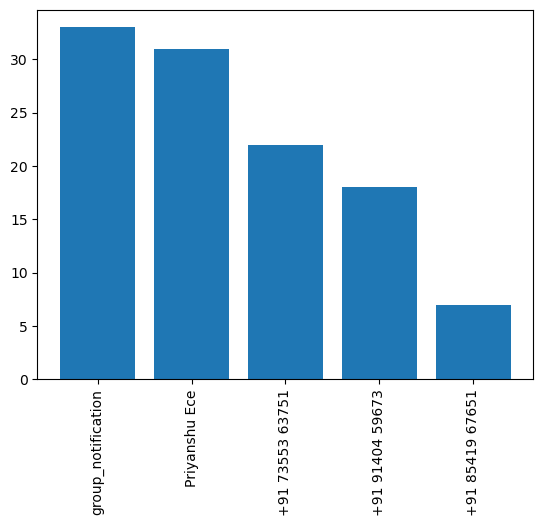

In [30]:
plt.bar(name, counts)
plt.xticks(rotation='vertical')
plt.show()

In [31]:
#find total percentage of all msg by users
#df['user'].value_counts().head()/df.shape[0]
round((df['user'].value_counts().head()/df.shape[0])*100,2)#2 denotes round off decimals

user
group_notification    23.57
Priyanshu Ece         22.14
+91 73553 63751       15.71
+91 91404 59673       12.86
+91 85419 67651        5.00
Name: count, dtype: float64

In [32]:
!pip install collections

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [33]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['msg'] != '<Media omitted>\n'] 

In [34]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [35]:
words = []

for msg in df['msg']:
    for word in msg.lower():
        if word not in stop_words:
            words.append(word)

In [36]:
words = []

for msg in temp['msg']:
    for word in msg.lower().split():
        if word not in stop_words:
            words.append(word) 

In [37]:
from collections import Counter 
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,8
1,deleted,8
2,2000,8
3,plant,6
4,invests,6
5,group,5
6,banknotes,5
7,rupees,5
8,crores,5
9,idea,4


In [38]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable


In [39]:
!pip install --upgrade emoji

Defaulting to user installation because normal site-packages is not writeable


In [40]:
import emoji

In [41]:
emojis = []
for msg in df['msg']:
    emojis.extend([e['emoji'] for e in emoji.emoji_list(msg)])

In [42]:
from collections import Counter

# Count occurrences of each emoji
emoji_counts = Counter(emojis)

# Create a DataFrame with the most common emojis
emoji_df = pd.DataFrame(emoji_counts.most_common(len(emoji_counts)), columns=['Emoji', 'Count'])

In [43]:
print(emoji_df)

   Emoji  Count
0      👉     14
1     👏🏻      2
2      📈      2
3      👊      1
4      😂      1
5      😉      1
6      🌍      1
7     🇮🇳      1
8      💸      1
9      🚀      1
10    👇🏼      1
11     🎉      1
12     🐂      1
13     💪      1
14     👇      1


<BarContainer object of 5 artists>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128074 (\N{FISTED HAND SIGN}) missing from current font.
  fig.canvas.print_figure(by

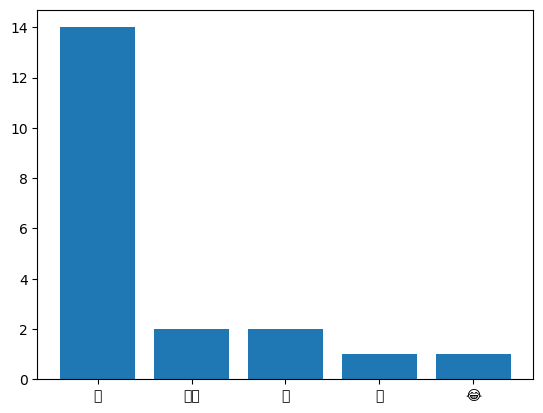

In [76]:
plt.bar(emoji_df["Emoji"].head(), emoji_df["Count"].head())

In [80]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached streamlit-1.42.2-py2.py3-none-any.whl (9.6 MB)
  Using cached GitPython-3.1.44-py3-none-any.whl (207 kB)
  Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
  Using cached altair-5.5.0-py3-none-any.whl (731 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)
     ---------------------------------------- 25.5/25.5 MB 1.6 MB/s eta 0:00:00
  Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
  Using cached narwhals-1.28.0-py3-none-any.whl (308 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.2-py3-none-any.whl (24 kB)


2025-03-02 00:44:03.998 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
C:\Users\91955\AppData\Roaming\Python\Python39\site-packages\streamlit\elements\pyplot.py:176: UserWarning: Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.
  fig.savefig(image, **kwargs)
C:\Users\91955\AppData\Roaming\Python\Python39\site-packages\streamlit\elements\pyplot.py:176: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.savefig(image, **kwargs)
C:\Users\91955\AppData\Roaming\Python\Python39\site-packages\streamlit\elements\pyplot.py:176: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.savefig(image, **kwargs)
C:\Users\91955\AppData\Roaming\Python\Python39\site-packages\streamlit\elements\pyplot.py:176: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing fr

DeltaGenerator()

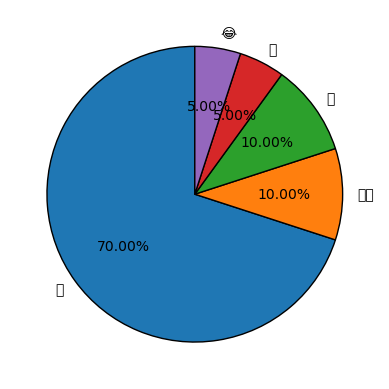

In [82]:
import streamlit as st

# Create the figure and axis
fig, ax = plt.subplots()

# Use .iloc[:, 0] and .iloc[:, 1] to avoid KeyErrors
ax.pie(emoji_df.iloc[:, 1].head(), labels=emoji_df.iloc[:, 0].head(), autopct="%0.2f%%", startangle=90, wedgeprops={'edgecolor': 'black'})

# Display the plot in Streamlit
st.pyplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128074 (\N{FISTED HAND SIGN}) missing from current font.
  fig.canvas.print_figure(by

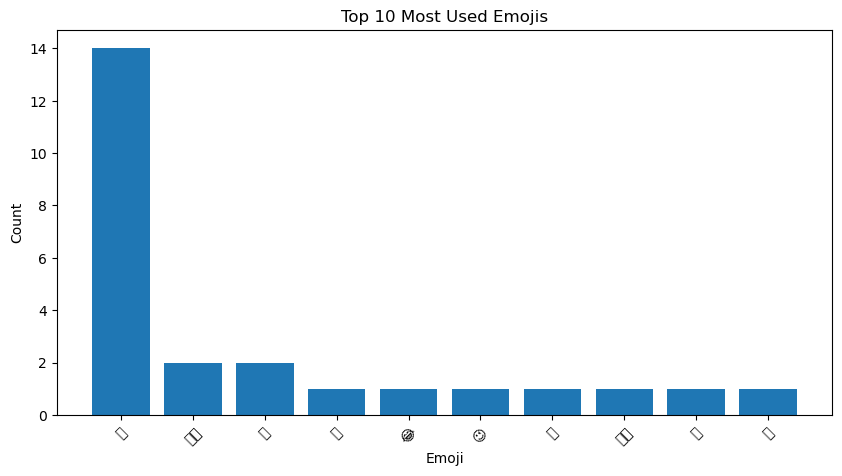

In [46]:
plt.figure(figsize=(10, 5))
plt.bar(emoji_df["Emoji"].head(10), emoji_df["Count"].head(10))  # Use column names
plt.xlabel("Emoji")
plt.ylabel("Count")
plt.title("Top 10 Most Used Emojis")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()   

In [47]:
timeline = df.groupby(['year', 'month_name', 'month']).count()['msg'].reset_index()
timeline

,year,month_name,month,msg
0,2022,June,6,1
1,2023,April,4,31
2,2023,August,8,2
3,2023,December,12,2
4,2023,July,7,15
5,2023,June,6,5
6,2023,March,3,40
7,2023,May,5,26
8,2023,November,11,1
9,2023,October,10,2


In [48]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month_name'][i] + "-" + str(timeline['year'][i]))

In [49]:
time

['June-2022',
 'April-2023',
 'August-2023',
 'December-2023',
 'July-2023',
 'June-2023',
 'March-2023',
 'May-2023',
 'November-2023',
 'October-2023',
 'February-2024',
 'January-2024',
 'July-2024',
 'May-2024',
 'September-2024',
 'February-2025']

In [50]:
timeline['time'] = time
timeline

,year,month_name,month,msg,time
0,2022,June,6,1,June-2022
1,2023,April,4,31,April-2023
2,2023,August,8,2,August-2023
3,2023,December,12,2,December-2023
4,2023,July,7,15,July-2023
5,2023,June,6,5,June-2023
6,2023,March,3,40,March-2023
7,2023,May,5,26,May-2023
8,2023,November,11,1,November-2023
9,2023,October,10,2,October-2023


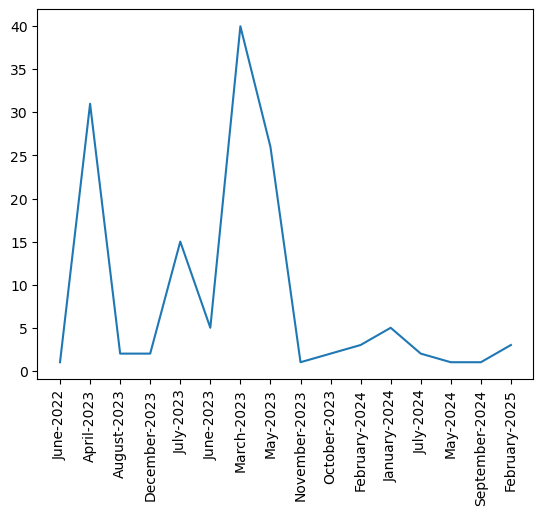

In [51]:
plt.plot(timeline['time'], timeline['msg'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df['only_date'] = df['date'].dt.date

In [53]:
daily_timeline = df.groupby('only_date').count()['msg'].reset_index()
daily_timeline

,only_date,msg
0,2022-06-06,1
1,2023-03-16,10
2,2023-03-17,4
3,2023-03-18,2
4,2023-03-20,3
...,...,...
63,2024-07-13,1
64,2024-09-17,1
65,2025-02-01,1
66,2025-02-09,1


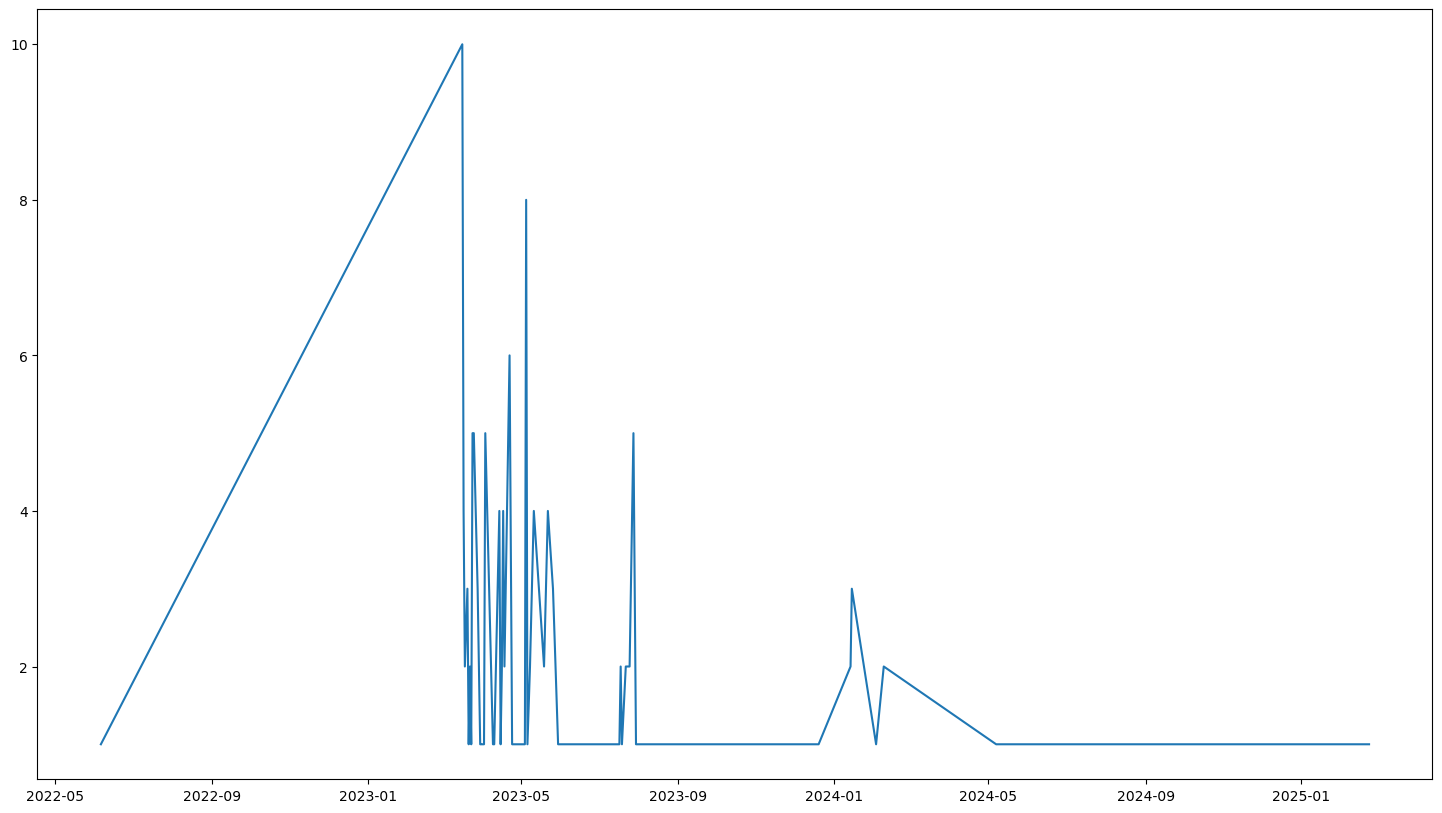

In [54]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'], daily_timeline['msg'])

In [55]:
df.head()

,date,user,msg,year,month_name,month,day,day_name,hour,minute,only_date
0,2023-03-16 14:53:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,March,3,16,Thursday,14,53,2023-03-16
1,2022-06-06 18:36:00,group_notification,"Priyanshu Ece created group ""BizMind Hub""\n",2022,June,6,6,Monday,18,36,2022-06-06
2,2023-03-16 14:53:00,group_notification,You joined using this group's invite link\n,2023,March,3,16,Thursday,14,53,2023-03-16
3,2023-03-16 14:53:00,group_notification,+91 95061 28080 joined using this group's invi...,2023,March,3,16,Thursday,14,53,2023-03-16
4,2023-03-16 14:59:00,group_notification,Indrajeet Raj joined using this group's invite...,2023,March,3,16,Thursday,14,59,2023-03-16


In [57]:
df['day_name'] = df['date'].dt.day_name()

In [58]:
df['day_name'].value_counts()

day_name
Friday       35
Monday       27
Saturday     25
Thursday     20
Tuesday      16
Sunday       11
Wednesday     6
Name: count, dtype: int64

In [61]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str('hour') + "-" + str(hour+1))

In [65]:
df['period'] = period

In [66]:
df.sample(5)

,date,user,msg,year,month_name,month,day,day_name,hour,minute,only_date,period
63,2023-04-22 12:08:00,+91 63864 75192,How much these startups spend to earn ₹1 \n\n👉...,2023,April,4,22,Saturday,12,8,2023-04-22,hour-13
120,2023-10-01 08:01:00,+91 73553 63751,<Media omitted>\n,2023,October,10,1,Sunday,8,1,2023-10-01,hour-9
76,2023-05-05 21:04:00,+91 91617 68656,And everyone knows that privatisation of railw...,2023,May,5,5,Friday,21,4,2023-05-05,hour-22
53,2023-04-14 11:31:00,+91 90264 38939,<Media omitted>\n,2023,April,4,14,Friday,11,31,2023-04-14,hour-12
10,2023-03-16 21:45:00,group_notification,+91 88820 21731 joined using this group's invi...,2023,March,3,16,Thursday,21,45,2023-03-16,hour-22


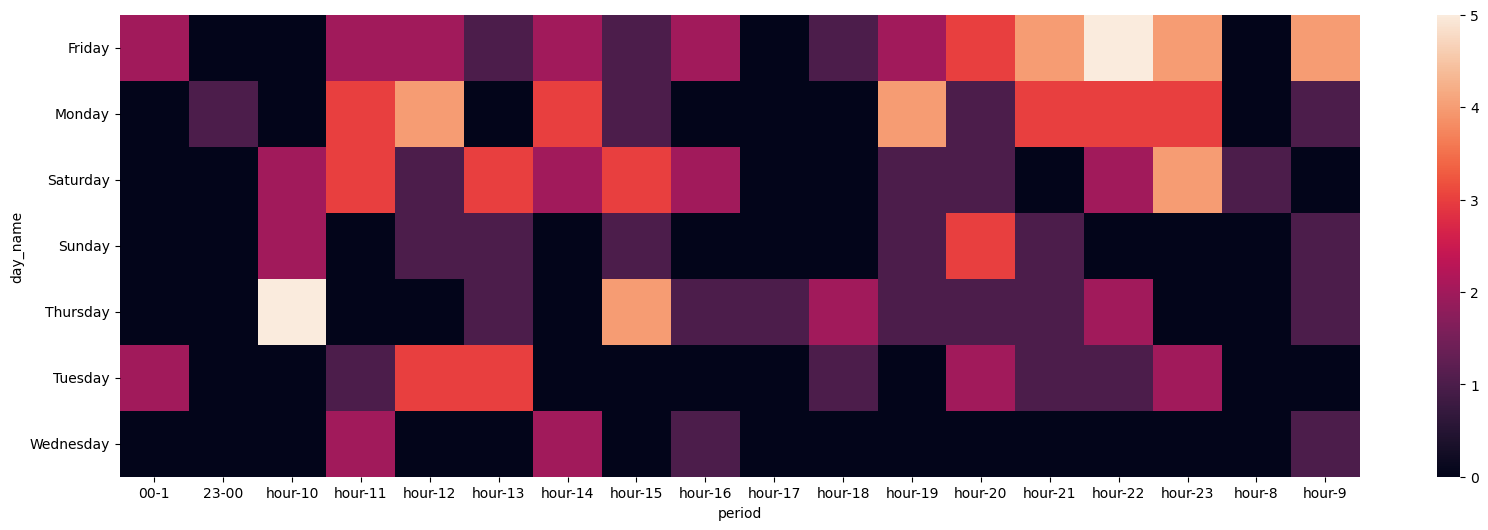

In [71]:
import seaborn as sns  
plt.figure(figsize=(20,6))
sns.heatmap((df.pivot_table(index='day_name',columns='period', values='msg', aggfunc='count')).fillna(0))
plt.yticks(rotation='horizontal')
plt.show()